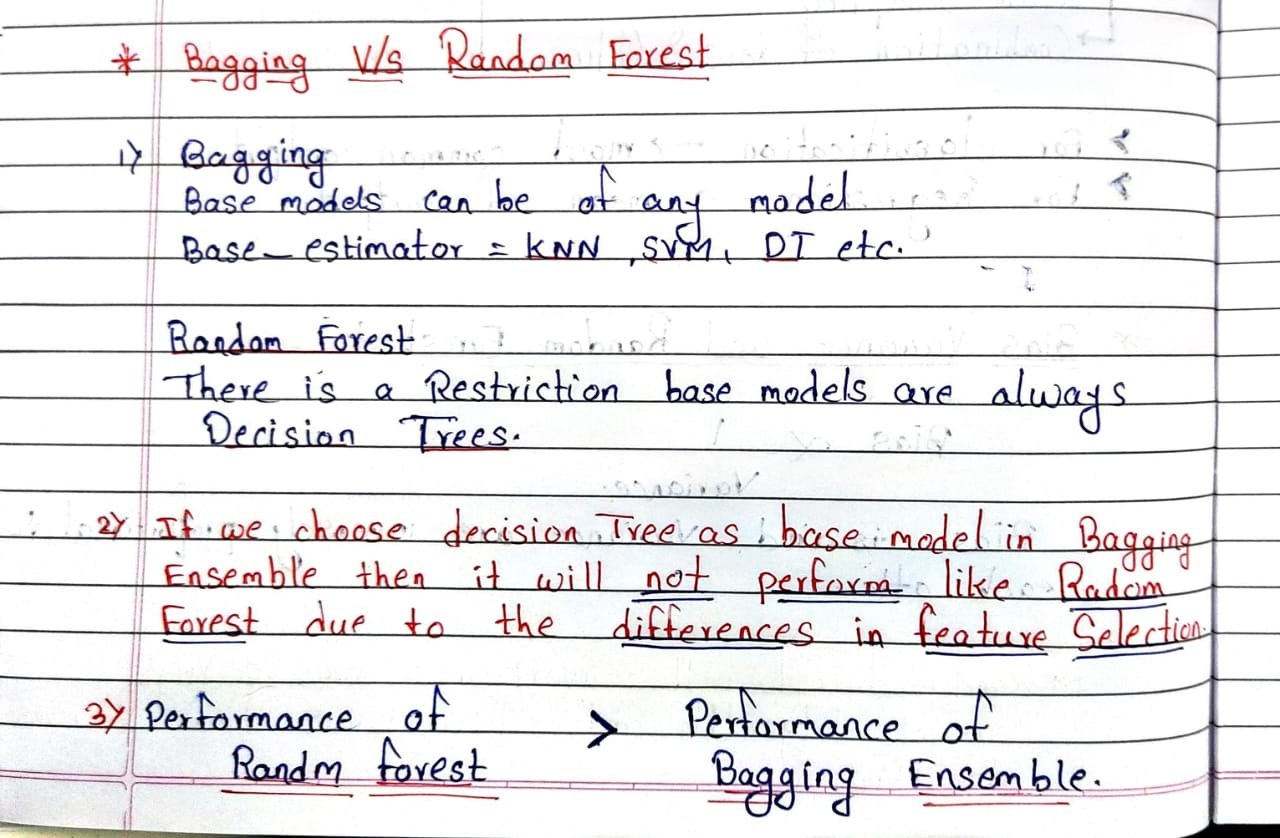

# Code

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier , BaggingClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
X,y=make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [4]:
df=pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target']=y
print(df.shape)
df.head()

(100, 6)


col1      col2      col3      col4      col5  target
0  2.162374 -0.502512  0.075036  3.124187 -1.416046       1
1 -1.245787  1.125332 -1.927895  2.068434  1.868512       0
2 -0.025483  1.491269 -1.081622  1.404135  0.435599       0
3 -2.795821 -0.344623 -0.398537  1.611678  3.040046       0
4 -1.333617  0.642424 -1.913033  1.722337  1.529604       0

# 1.Bagging_Ensemble

In [5]:
bag=BaggingClassifier(max_features=2)

In [6]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

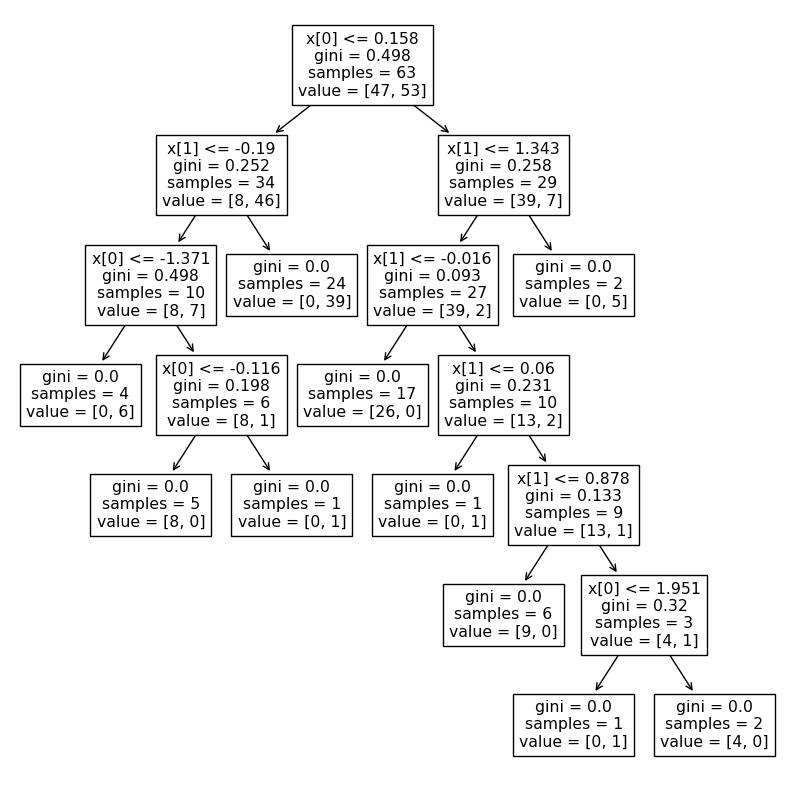

In [8]:
plt.figure(figsize=(10,10))
plot_tree(bag.estimators_[0])
plt.show()

### From above it can be seen that , in Bagging ensemble Spliiting is Done At the Tree Level for Bagging.<br> Such that , Features(Columns) for splitting the tree is finalize before constructing the tree. <br>It will use the same column for splitting (for eg in above tree uses 1 & 0 for splitting) and never touches the other column for splitting the tree

# <hr>

# 2.Random_Forest

In [10]:
rf=RandomForestClassifier(max_features=2)

In [11]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

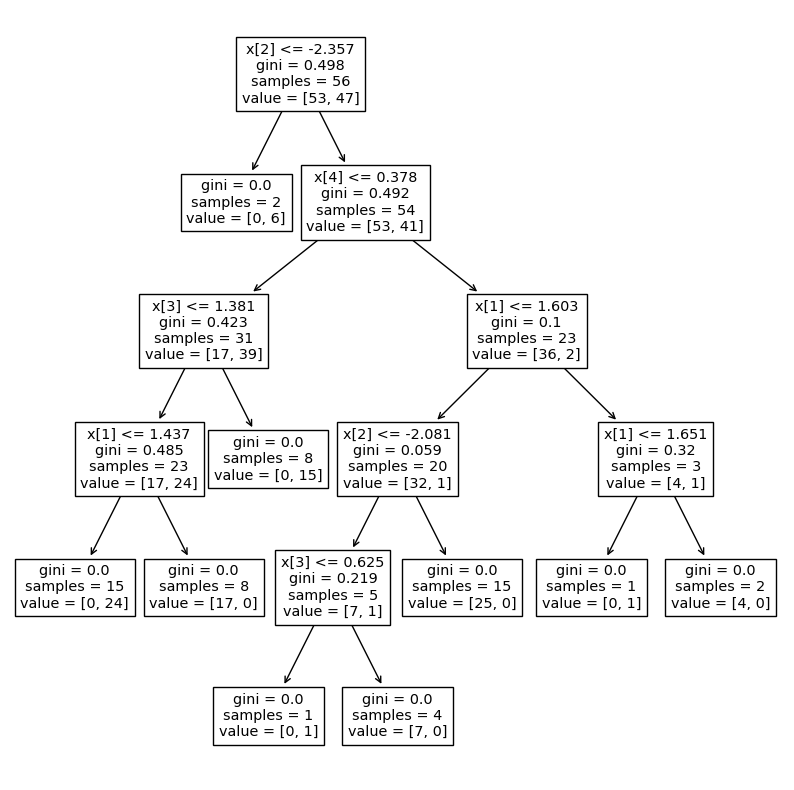

In [12]:
plt.figure(figsize=(10,10))
plot_tree(rf.estimators_[4])
plt.show()

### From above you can see that , Splitting for Random_Forest classifier is at Node Level .<br>Such that , features(Columns) for splitting is finalized at each node just before splitting. we are performing node level splitting at each node. (For eg for above you can see that , we are usinh all columns [0,1,2,3] for splitting.)

# <hr>

## From Above we can understand that Due to Node Level Splitting Random forest performance better than Bagging ensemble as it uses Tree level splitting for tree.<br> As node level splitting (Random Forest) creates more randomness for the base model than tree level splitting (Bagging Ensemble) , random forest performs good than bagging ensemble.

# Conclude